In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import linregress

In [2]:
# Import files from individual projects
subsidy_file = pd.read_csv('subsidy_by_state.csv')
aq_file = pd.read_csv('cleaned_air.csv')
transpo_file = pd.read_csv('Resources/public_transportation.csv')

In [3]:
# Subsidy file cleaning
subsidy_file = subsidy_file.rename(columns={'year':'Year','state':'State'})
subsidy_file['Year'] = subsidy_file['Year'].astype(str)
subsidy_file = subsidy_file.drop(['Unnamed: 0'], axis=1)
subsidy_file.head()

,subsidies excluding hov,Year,subsidies,State
0,0.0,2010,0.0,Alabama
1,0.0,2011,0.0,Alabama
2,0.0,2012,0.0,Alabama
3,0.0,2013,0.0,Alabama
4,0.0,2014,0.0,Alabama


In [4]:
# Air Quality cleaning
aq_file['Year'] = aq_file['Year'].astype(str)
aq_file = aq_file.drop(['Unnamed: 0'], axis=1)
aq_file.head()

,State,Year,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
0,Alabama,2013,12.065635,0.012099,0.750311,0.211007
1,Alabama,2014,9.411746,0.024660,1.186517,0.205921
2,Alabama,2015,9.078580,0.024000,1.009429,0.221027
3,Alabama,2016,9.524873,0.028348,0.835118,0.209514
4,Alaska,2014,11.658510,0.010307,5.951531,0.455444


In [5]:
# Public Transportation cleaning
new = transpo_file['City'].str.split(", ", n=1, expand = True)
transpo_file['State'] = new[1]
transpo_file['City'] = new[0]
us_state_abbrev = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'DC': 'District of Columbia',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
}
transpo_file['State'] = transpo_file['State'].map(us_state_abbrev)
transpo_file.head()

,Overall,City,Total Score,Accessibility,Safety,Resources,State
0,90,Gilbert,48.52,100,61,67,Arizona
1,25,Laredo,61.52,99,5,43,Texas
2,76,Glendale,50.84,98,61,67,Arizona
3,49,Birmingham,56.15,97,30,44,Alabama
4,93,Arlington,45.70,96,79,20,Texas


In [6]:
# Creating df to compare air quality and subsidies
aq_subsidy = pd.merge(subsidy_file, aq_file,  how='left', left_on=['State','Year'], right_on = ['State','Year'])
aq_subsidy.loc[aq_subsidy['State'] == 'Colorado']

,subsidies excluding hov,Year,subsidies,State,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
30,200.000000,2010,200.000000,Colorado,16.171138,0.022955,1.028090,0.365696
31,0.000000,2011,0.000000,Colorado,17.526491,0.027845,1.407494,0.332983
32,1093.754578,2012,1093.754578,Colorado,20.320904,0.026317,1.336345,0.370598
33,1420.867531,2013,1420.867531,Colorado,14.342691,0.028709,1.060189,0.307037
34,1541.021469,2014,1541.021469,Colorado,16.904157,0.027259,0.942433,0.318473
35,2289.431534,2015,2289.431534,Colorado,20.039145,0.024451,1.034266,0.389759


In [7]:
# DF to compare air quality and public transportation infrastructure
states = aq_file['State'].unique()
aq_transpo = pd.DataFrame(columns = {'State','Transportation Score','NO2 Mean','O3 Mean','SO2 Mean', 'CO Mean'})
for state in states:
    # Air quality consolodation
    state_aq = aq_file.loc[aq_file['State'] == state]
    state_transpo = transpo_file.loc[transpo_file['State'] == state]
    state_score = state_transpo['Total Score'].mean()
    state_NO2 = state_aq['NO2 Mean'].mean()
    state_O3 = state_aq['O3 Mean'].mean()
    state_SO2 = state_aq['SO2 Mean'].mean()
    state_CO = state_aq['CO Mean'].mean()
    df_to_append = pd.DataFrame([{'State':state,'Transportation Score':state_score,'NO2 Mean': state_NO2,
                                  'O3 Mean': state_O3,'SO2 Mean': state_SO2,'CO Mean': state_CO}])
    aq_transpo = pd.concat([aq_transpo,df_to_append])
    
aq_transpo = aq_transpo.dropna()
aq_transpo

,O3 Mean,NO2 Mean,State,CO Mean,SO2 Mean,Transportation Score
0,0.022277,10.020209,Alabama,0.211867,0.945344,56.150000
0,0.012262,11.387549,Alaska,0.430333,6.055271,54.880000
0,0.024788,19.031569,Arizona,0.492650,1.312588,51.781429
0,0.026015,13.327613,California,0.441282,1.111572,59.483529
0,0.022505,19.886469,Colorado,0.467079,1.627226,59.413333
0,0.026755,7.453687,Florida,0.449908,0.479377,44.015000
0,0.020052,11.848949,Georgia,0.328806,0.529493,56.470000
0,0.025458,3.182240,Hawaii,0.369006,1.020358,67.850000
0,0.024534,8.553367,Idaho,0.197854,0.419854,64.450000
0,0.022953,15.460473,Illinois,0.403392,2.752821,63.330000


R-Value: -0.02428867381001295
The P-value is only 0.0 so we must accept the Null Hypothesis:
Subsidies have no impact on the level of SO2 in each state.


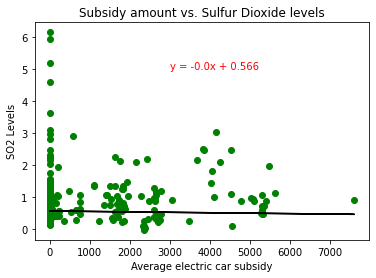

In [30]:
aq_subsidy = aq_subsidy.dropna()
aq_subsidy = aq_subsidy[(aq_subsidy['subsidies'] >= 0)]
plt.scatter(aq_subsidy['subsidies'], aq_subsidy['SO2 Mean'],c='green')
plt.title('Subsidy amount vs. Sulfur Dioxide levels')
plt.ylabel('SO2 Levels')
plt.xlabel('Average electric car subsidy')
(slope, inter, rval, pval, stderr) = linregress(aq_subsidy['subsidies'],list(map(int, aq_subsidy['SO2 Mean'])))
equation_thing = aq_subsidy['subsidies'] * slope + inter
equation_string = f"y = {round(slope,4)}x + {round(inter,3)}"
plt.plot(aq_subsidy['subsidies'], equation_thing,'-',color='black')
plt.text(3000,5,equation_string,c='red')
print(f'R-Value: {rval}')
# Hypothesis testing
from scipy import stats
Null = 'Subsidies have no impact on the level of SO2 in each state.'
Alternative = 'Subsidies have an impact on the level of SO2 in each state.'
stats, pval = stats.ttest_ind(aq_subsidy['subsidies'], aq_subsidy['SO2 Mean'], equal_var=False)
if pval < .5:
    print(f'The P-value is only {round(pval,4)} so we must accept the Null Hypothesis:')
    print(Null)
else:
    print(f'The P-value is {round(pval,4)} so we proved the altervative hypothesis')
    print(Alternative)
plt.show()

R-Value: -0.04041105300347709
Slope: -1.1323061372474311e-07
The P-value is only 0.0 so we must accept the Null Hypothesis:
Subsidies have no impact on the level of Ozone in each state.


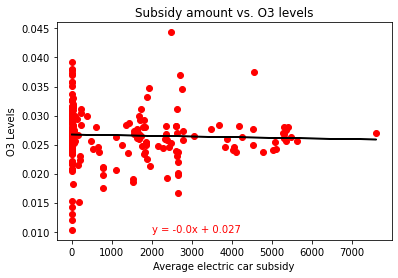

In [32]:
plt.scatter(aq_subsidy['subsidies'], aq_subsidy['O3 Mean'],c='red')
plt.title('Subsidy amount vs. O3 levels')
plt.ylabel('O3 Levels')
plt.xlabel('Average electric car subsidy')
(slope, inter, rval, pval, stderr) = linregress(aq_subsidy['subsidies'],aq_subsidy['O3 Mean'])
equation_thing = aq_subsidy['subsidies'] * slope + inter
equation_string = f"y = {round(slope,3)}x + {round(inter,3)}"
plt.plot(aq_subsidy['subsidies'], equation_thing,'-',color='black')
plt.text(2000,.01,equation_string,c='red')
print(f'R-Value: {rval}')
print(f'Slope: {slope}')
# Hypothesis testing
from scipy import stats
Null = 'Subsidies have no impact on the level of Ozone in each state.'
Alternative = 'Subsidies have an impact on the level of Ozone in each state.'
stats, pval = stats.ttest_ind(aq_subsidy['subsidies'], aq_subsidy['O3 Mean'], equal_var=False)
if pval < .5:
    print(f'The P-value is only {round(pval,6)} so we must accept the Null Hypothesis:')
    print(Null)
else:
    print(f'The P-value is {round(pval,4)} so we proved the altervative hypothesis')
    print(Alternative)
plt.show()

The P-value is only 0.0 so we must accept the Null Hypothesis:
Public Transportation Infrastructure has no impact on the level of Ozone in each state.


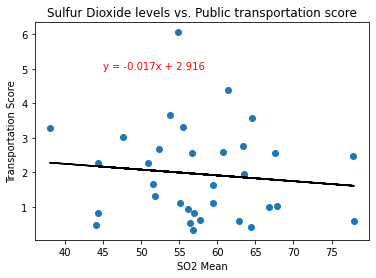

R-Value: -0.11092648809339511


In [34]:
plt.scatter(aq_transpo['Transportation Score'],aq_transpo['SO2 Mean'],cmap='PuBu')
plt.xlabel('SO2 Mean')
plt.ylabel('Transportation Score')
plt.title('Sulfur Dioxide levels vs. Public transportation score')
(slope, inter, rval, pval, stderr) = linregress(aq_transpo['Transportation Score'],aq_transpo['SO2 Mean'])
equation_thing = aq_transpo['Transportation Score'] * slope + inter
equation_string = f"y = {round(slope,3)}x + {round(inter,3)}"
plt.plot(aq_transpo['Transportation Score'], equation_thing,'-',color='black')
plt.text(45,5,equation_string,c='red')
# Hypothesis testing
from scipy import stats
Null = 'Public Transportation Infrastructure has no impact on the level of Sulfur Dioxide in each state.'
Alternative = 'Public Transportation Infrastructure has an impact on the level of Ozone in each state.'
stats, pval = stats.ttest_ind(aq_transpo['Transportation Score'],aq_transpo['SO2 Mean'], equal_var=False)
if pval < .5:
    print(f'The P-value is only {round(pval,6)} so we must accept the Null Hypothesis:')
    print(Null)
else:
    print(f'The P-value is {round(pval,4)} so we proved the altervative hypothesis')
    print(Alternative)
plt.show()
print(f'R-Value: {rval}')

The P-value is only 6.697700104840194e-28 so we must accept the Null Hypothesis:
Public Transportation Infrastructure has no impact on the level of Ozone in each state.


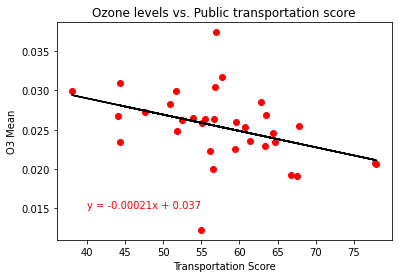

R-Value: -0.4031468048697786


In [37]:
plt.scatter(aq_transpo['Transportation Score'],aq_transpo['O3 Mean'],c='red')
plt.ylabel('O3 Mean')
plt.xlabel('Transportation Score')
plt.title('Ozone levels vs. Public transportation score')
(slope, inter, rval, pval, stderr) = linregress(aq_transpo['Transportation Score'],aq_transpo['O3 Mean'])
equation_thing = aq_transpo['Transportation Score'] * slope + inter
equation_string = f"y = {round(slope,5)}x + {round(inter,3)}"
plt.plot(aq_transpo['Transportation Score'], equation_thing,'-',color='black')
plt.text(40,.015,equation_string,c='red')
# Hypothesis testing
from scipy import stats
Null = 'Public Transportation Infrastructure has no impact on the level of Ozone in each state.'
Alternative = 'Public Transportation Infrastructure has an impact on the level of Ozone in each state.'
stats, pval = stats.ttest_ind(aq_transpo['Transportation Score'],aq_transpo['O3 Mean'], equal_var=False)
if pval < .5:
    print(f'The P-value is only {pval} so we must accept the Null Hypothesis:')
    print(Null)
else:
    print(f'The P-value is {round(pval,4)} so we proved the altervative hypothesis')
    print(Alternative)
plt.show()
print(f'R-Value: {rval}')